# Assignment 1 - Machine Learning (INFO 7390) Review
# [Titanic: Machine Learning from Disaster | Kaggle](https://www.kaggle.com/c/titanic/data)

## Dataset Dictionary
Variable - Definition (Key)
* Survival - Survival (0 = No, 1 = Yes)
* Pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex - Sex	
* Age - Age in years	
* Sibsp - # of siblings / spouses aboard the Titanic	
* Parch - # of parents / children aboard the Titanic	
* Ticket - Ticket number	
* Fare - Passenger fare	
* Cabin - Cabin number	
* Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Variable Notes
* Pclass: A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower

* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


* Sibsp: The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)


* Parch: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.

##  **Dimensions of the DataFrame**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

**Checking** if the PassengerID column is unique for each and every row in "train" dataset:

In [6]:
train.PassengerId.nunique() == train.shape[0]

True

**Checking** if the "train" and "test" datasets are distinct, with respect to their PassengerID:

In [7]:
len(pd.merge(train, test, on='PassengerId')) == 0

True

Following are the first 5 rows of the "train" and "test" dataset:

In [8]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

Train dataset information:

In [10]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [11]:
train.describe(include=['O'])

Name   Sex  Ticket  \
count                                               891   891     891   
unique                                              891     2     681   
top     Lobb, Mrs. William Arthur (Cordelia K Stanlick)  male  347082   
freq                                                  1   577       7   

              Cabin Embarked  
count           204      889  
unique          147        3  
top     C23 C25 C27        S  
freq              4      644

* Duplicate ticket number "CA. 2343": repeated 7 times
* Duplicate cabin number "C23 C25 C27": repeated 4 times
* 644 people were embarked from port "S"
* 577 were Male and the rest were Female

In [12]:
train.shape

(891, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
train['Survived'].value_counts(normalize = True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

As per the exploration:
* Number of Observations:            **891**
* Number of Features (or Variables): **11 (excl. Target Variable/Label)**
* Target Variable:                   **“survival” (0 = No, 1 = Yes)**
* Different Data Types of Features:  **2 (Categorical & Numerical, excl. Textual)**

* Age has (891 – 714) **177 missing values**
* Only **38.38%** of the passengers survived

Identification of the problem:
* The problem statement requires to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, predict a 0 or 1 value for the Survived variable.
* One sample belongs to one class only and there are only two classes (namely 0 or 1).
* Therefore, it is a **binary classification problem with single column**.


Identification of different variables in the data:
* Age, Sibsp, Parch - **Numerical** (excl. Fare, out of context)
* Pclass, Sex, EmbarkedPort - **Categorical**
* Survived - **Target**
* Name, Ticket, Cabin - Textual (out of context)

# **Data Munging**

While EDA, following were few problems in the dataset:

* 31% (277 out of 891) of missing values in "Age"
* Explore if Name, Ticket and Cabin contain any useful information.

Following is the count of **missing values** in all the variables of "train" datasets:

In [16]:
train.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Comparing the count of missing values in "train" and "train" dataset:

In [17]:
NaN_compare = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']);
print(NaN_compare[NaN_compare.sum(axis=1)>0])

          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0


### 1) Drop Un-wanted Variables:

* "Cabin": 687 missing values (almost 80%, which is a lot)
* "Ticket": Mix of numbers and text, and does not seem to contain any information

Dropping the two variables from the dataset: "Cabin" & "Ticket"

In [18]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 2) Address Missing Values in "Age":

Hypothesis to fill 31% of missing values in "Age":
* Using salutations in Name, Gender and Pclass combined to extract information required.

In [19]:
# Function extracts the salutation from a Name in format: Family_Name, Salutation. First Name
def salutation_extract(word):
 return word.split(',')[1].split('.')[0].strip()

In [20]:
# Creating new column "Salutation" with the above function applied
train['Salutation'] = train['Name'].apply(salutation_extract)
test['Salutation'] = test['Name'].apply(salutation_extract)

In [21]:
# Distribution of the "Salutation" in "train" dataset
train.groupby('Salutation').PassengerId.count()

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: PassengerId, dtype: int64

In [22]:
# Distribution of the "Salutation" in "test" dataset
test.groupby('Salutation').PassengerId.count()

Salutation
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
Name: PassengerId, dtype: int64

In [23]:
# Creating new dF, by keeping rows with NaN in "Age"
df_train = train.loc[pd.isnull(train['Age'])]
df_test = test.loc[pd.isnull(test['Age'])]

In [24]:
# Distribution of the Salutation in "df_train" dataset (that only has NaN "Age")
df_train.groupby('Salutation').PassengerId.count()

Salutation
Dr          1
Master      4
Miss       36
Mr        119
Mrs        17
Name: PassengerId, dtype: int64

In [25]:
# Distribution of the Salutation in "df_test" dataset (that only has NaN "Age")
df_test.groupby('Salutation').PassengerId.count()

Salutation
Master     4
Miss      14
Mr        57
Mrs       10
Ms         1
Name: PassengerId, dtype: int64

* There are 4 main Salutations – Mr, Mrs, Miss and Master, in the "train" dataset
* Also in "df_train" dataset (that only has NaN "Age"), these are the only Salutations

In [26]:
# Function to create group_salutation: Mr, Mrs, Miss, Master & Others:
def group_salutation(old_salutation):
    if old_salutation == 'Mr':
        return('Mr')
    elif old_salutation == 'Mrs':
        return('Mrs')
    elif old_salutation == 'Master':
        return('Master')
    elif old_salutation == 'Miss':
        return('Miss')
    else:
        return('Others')

In [27]:
# Creating new column "Group_Salutation" with the above function applied
train['Group_Salutation'] = train['Salutation'].apply(group_salutation)
test['Group_Salutation'] = test['Salutation'].apply(group_salutation)

In [28]:
# Distribution of the "Group_Salutation" in modified "train" dataset
train.groupby('Group_Salutation').PassengerId.count()

Group_Salutation
Master     40
Miss      182
Mr        517
Mrs       125
Others     27
Name: PassengerId, dtype: int64

In [29]:
# Distribution of the "Group_Salutation" in modified "test" dataset
test.groupby('Group_Salutation').PassengerId.count()

Group_Salutation
Master     21
Miss       78
Mr        240
Mrs        72
Others      7
Name: PassengerId, dtype: int64

In [30]:
sns.boxplot(x='Group_Salutation', y='Age', data=train);

In [31]:
sns.boxplot(x='Sex', y='Age', data=train, hue='Pclass');

* The above graph shows a sloping effect of median "Age" from "Pclass" 1 to 3, for both the "Sex"

In [32]:
# Creating a pivot to calculate median w.r.t. "Age", "Group_Salutation" & "PClass
median_table_train = train.pivot_table(values='Age', index=['Group_Salutation'], columns=['Pclass', 'Sex'], aggfunc=np.median)
median_table_train

Pclass                1            2            3      
Sex              female  male female  male female  male
Group_Salutation                                       
Master              NaN   4.0    NaN   1.0    NaN   4.0
Miss               30.0   NaN   24.0   NaN   18.0   NaN
Mr                  NaN  40.0    NaN  31.0    NaN  26.0
Mrs                41.5   NaN   32.0   NaN   31.0   NaN
Others             28.5  49.0   28.0  46.5    NaN   NaN

In [33]:
# Creating a pivot to calculate median w.r.t. "Age", "Group_Salutation" & "PClass
median_table_test = test.pivot_table(values='Age', index=['Group_Salutation'], columns=['Pclass', 'Sex'], aggfunc=np.median)
median_table_test

Pclass                1            2            3      
Sex              female  male female  male female  male
Group_Salutation                                       
Master              NaN   9.5    NaN   5.0    NaN   7.0
Miss               32.0   NaN   19.5   NaN   22.0   NaN
Mr                  NaN  42.0    NaN  28.0    NaN  25.0
Mrs                48.0   NaN   29.0   NaN   28.0   NaN
Others             39.0  53.0    NaN  35.5    NaN   NaN

In [34]:
# Function to return median value from "median_table" w.r.t. "Age", "Group_Salutation" & "PClass
def median_age_train(x_series):
    return median_table_train[x_series['Pclass']][x_series['Sex']][x_series['Group_Salutation']]
def median_age_test(x_series):
    return median_table_test[x_series['Pclass']][x_series['Sex']][x_series['Group_Salutation']]

In [35]:
# Replace missing values in "Age"
train['Age'].fillna(train[train['Age'].isnull()].apply(median_age_train, axis=1), inplace=True)
test['Age'].fillna(test[test['Age'].isnull()].apply(median_age_test, axis=1), inplace=True)

In [36]:
# Checking the possibility: if only one missing value is present w.r.t. "Age", "Group_Salutation" & "PClass
print(train['Age'].isnull().value_counts(), test['Age'].isnull().value_counts())

False    891
Name: Age, dtype: int64 False    417
True       1
Name: Age, dtype: int64


In [37]:
# Addressing the left out NaN in "test" dataset:
test.loc[test.Age.isnull()]

PassengerId  Pclass                     Name     Sex  Age  SibSp  Parch  \
88          980       3  O'Donoghue, Ms. Bridget  female  NaN      0      0   

    Ticket  Fare Cabin Embarked Salutation Group_Salutation  
88  364856  7.75   NaN        Q         Ms           Others

In [38]:
test.loc[88, 'Age'] = test.Age.median()

# **Exploratory Data Analysis**

## 1) EDA on Categorical Variables

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

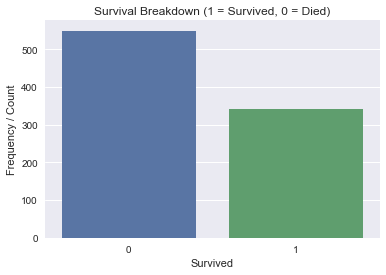

In [40]:
sns.countplot(x='Survived', data=train);
plt.ylabel('Frequency / Count');
plt.title("Survival Breakdown (1 = Survived, 0 = Died)");

As the histogram visualizes, that the survival rate(38.38%) was very low.

### 1.1) Sex: Male vs Female - Survival Analysis

In [41]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

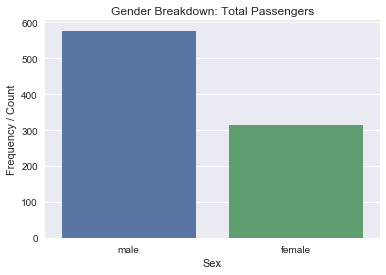

In [42]:
sns.countplot(x='Sex', data=train);
plt.ylabel('Frequency / Count');
plt.title("Gender Breakdown: Total Passengers");

In [43]:
train.groupby(['Sex']).Survived.value_counts().unstack()

Survived    0    1
Sex               
female     81  233
male      468  109

In [44]:
train.groupby(['Sex']).Survived.value_counts(normalize=True).unstack() * 100

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815

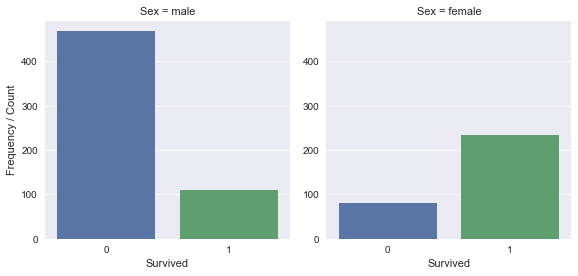

In [45]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=train).set_axis_labels('Survived','Frequency / Count');

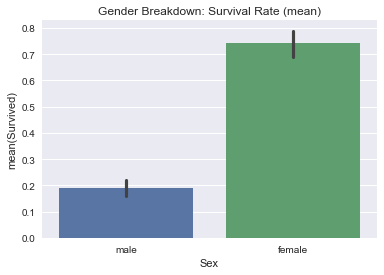

In [46]:
sns.barplot(x='Sex', y='Survived', data=train);
plt.ylabel('mean(Survived)');
plt.title("Gender Breakdown: Survival Rate (mean)");

As per the exploration:
* There were **577 Male** and **314 Female** on board
* Survival Rate: **18.89%** i.e. 109 Male survived, and **74.20%** i.e. 233 Female survived

*Women were more likely to survive than men.*

### 1.2) Pclass: A proxy for socio-economic status (SES) - Survival Analysis

In [47]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

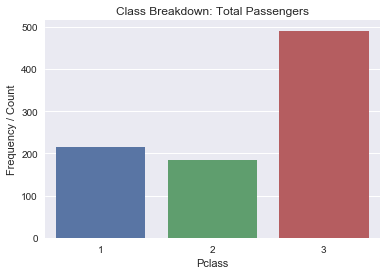

In [48]:
sns.countplot(x='Pclass', data=train);
plt.ylabel('Frequency / Count');
plt.title("Class Breakdown: Total Passengers");

In [49]:
train.groupby(['Pclass']).Survived.value_counts().unstack()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

In [50]:
train.groupby(['Pclass']).Survived.value_counts(normalize=True).unstack() * 100

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253

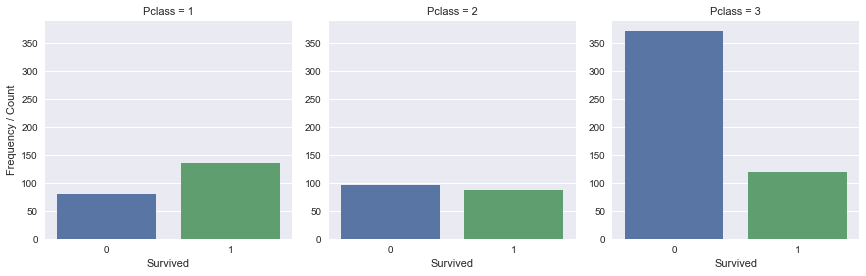

In [51]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train).set_axis_labels('Survived','Frequency / Count');

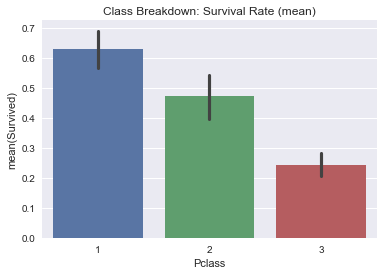

In [52]:
sns.barplot(x='Pclass', y='Survived', data=train);
plt.ylabel('mean(Survived)');
plt.title("Class Breakdown: Survival Rate (mean)");

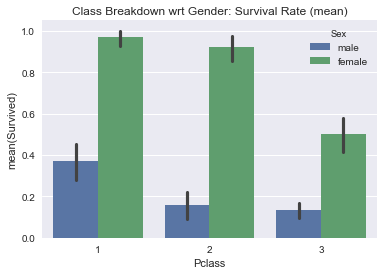

In [53]:
# Survival Rate grouped by Pclass and Sex
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train);
plt.ylabel('mean(Survived)');
plt.title("Class Breakdown wrt Gender: Survival Rate (mean)");

As per the exploration:
* Passenger SES Distribution: **216** in 1st Class, **184** in 2nd Class, and **491** in 3rd Class
* Survival Rate: **62.96%** i.e. 136 of 1st Class, **47.28%** i.e. 87 of 2nd Class, and **24.24%** i.e. 119 of 3rd Class survived

*Passengers that travelled in first class were more likely to survive. On the other hand, passengers travelling in third class were more unlikely to survive.*

### 1.3) Embarked: Port of Embarkation - Survival Analysis

In [54]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

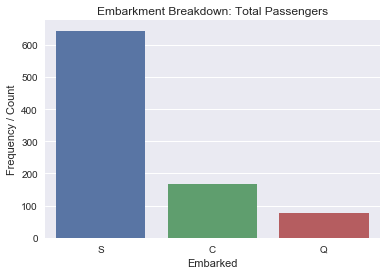

In [55]:
sns.countplot(x='Embarked', data=train);
plt.ylabel('Frequency / Count');
plt.title("Embarkment Breakdown: Total Passengers");

In [56]:
train.groupby(['Embarked']).Survived.value_counts().unstack()

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217

In [57]:
train.groupby(['Embarked']).Survived.value_counts(normalize=True).unstack() * 100

Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652

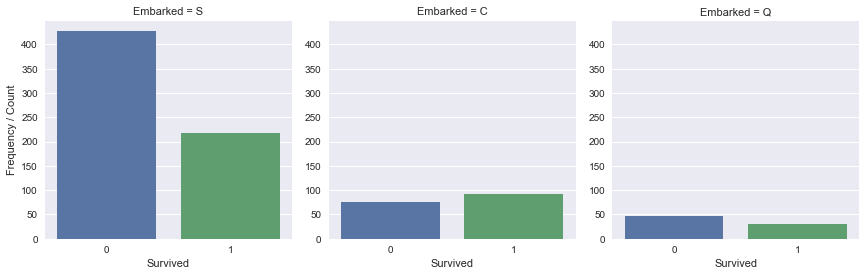

In [58]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train).set_axis_labels('Survived','Frequency / Count');

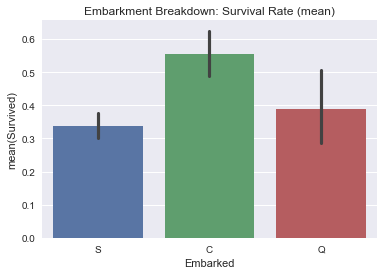

In [59]:
sns.barplot(x='Embarked', y='Survived', data=train);
plt.ylabel('mean(Survived)');
plt.title("Embarkment Breakdown: Survival Rate (mean)");

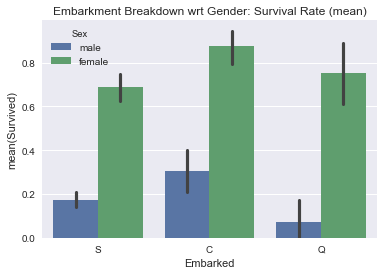

In [60]:
# Survival Rate grouped by Embarked and Sex
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train);
plt.ylabel('mean(Survived)');
plt.title("Embarkment Breakdown wrt Gender: Survival Rate (mean)");

As per the exploration:
* Passenger Embarked: **168** from Cherbourg, **77** from Queenstown, and **644** from Southampton
* Survival Rate: **55.35%** i.e. 93 from Cherbourg, **38.96%** i.e. 30 from Queenstown, and **33.69%** i.e. 217 from Southampton survived

*Passengers that embarked in Southampton were less likely to survive.*

## 2) EDA on Numerical Variables

### 2.1) Pair Plots and Corelation Heat Map - Survival Analysis

* Pair Plot with 'Survived' hue:

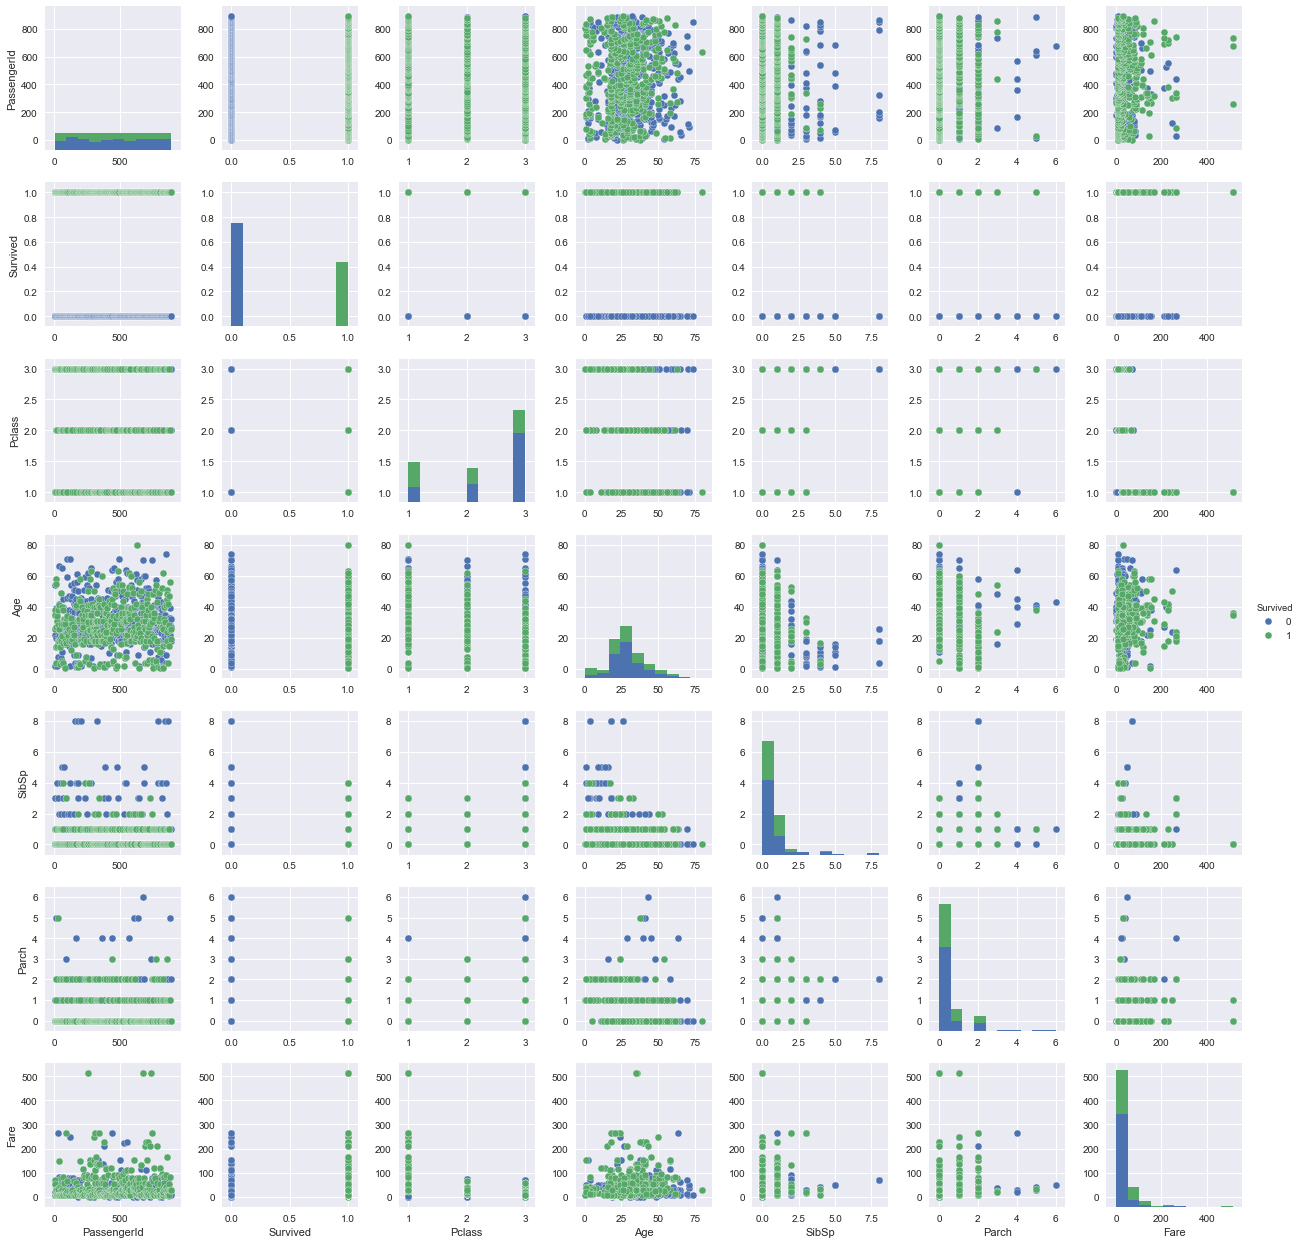

In [61]:
sns.pairplot(hue='Survived', data=train);

* Corelation Heat Map of Numeric Variables:

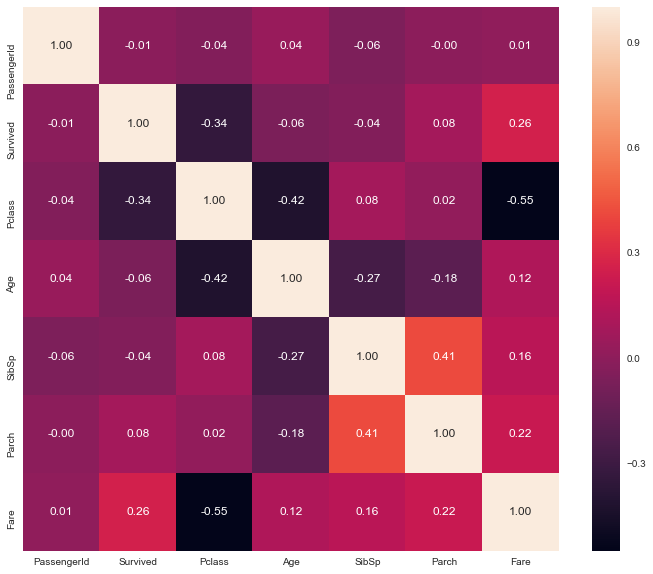

In [62]:
plt.figure(figsize=(12,10));
sns.heatmap(train.corr(), annot=True, fmt=".2f");
plt.show();

* Corelation -0.34: Survived is inversely propotional to the Pclass:
    * We have already examined the Pclass dependency upon Survived
    * As Pclass and Fare are closely related, we will examine the numeric variable **Fare** here
* Corelation -0.42: Pclass is inversely propotional to the Age:
    * From above 2 inferences, **Age** is directly propotional to Survived
* Corelation -0.31: Age is inversely propotional to the SbSp:
    * This provides an insight, that younger passenger have more chances of having siblings/spouses
* Corelation +0.41: SbSp is directely propotional to the Parch:
    * Also, passengers with siblings/spouses are more likely to have parents/children

### 2.2) Fare: Ticket Fares - Survival Analysis

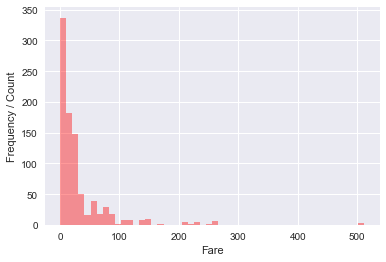

In [63]:
sns.distplot(train.Fare, kde=False, color='Red');
plt.ylabel('Frequency / Count');

*Most passengers paid less than 100 for travelling with the Titanic.*

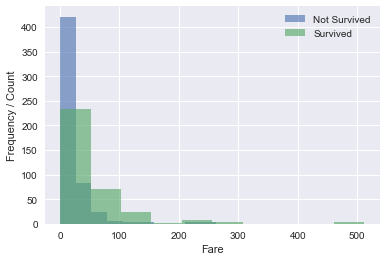

In [64]:
train.groupby(['Survived']).Fare.hist(alpha=0.63);
plt.ylabel('Frequency / Count');
plt.xlabel('Fare');
labels = ['Not Survived', 'Survived'];
plt.legend(labels);

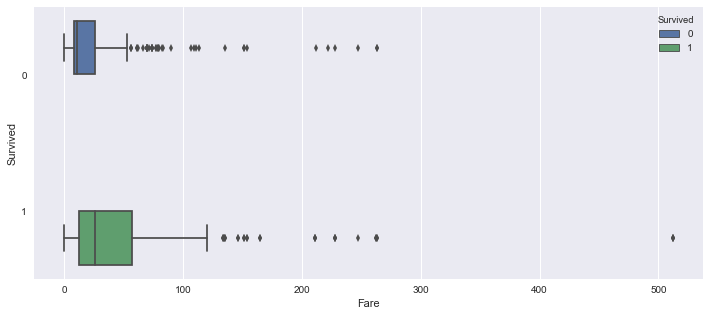

In [65]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Fare', y='Survived', hue='Survived', orient='h', data=train);

* The box-plot for suggest following:
    * Median Fare for survived passengers is almost equal to the Max. Fare paid by passengers who did not survived.
    * Survival rate of passengers, highly depends upon the Fare paid by them.

*The passengers who paid more had a higher chance of surviving.*

Performing further analysis based upon passenger's fare.

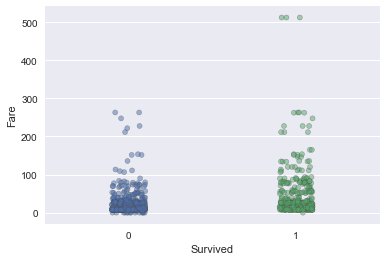

In [66]:
# A Categorical Scatterplot
sns.stripplot(x='Survived', y='Fare', data=train, alpha=0.5, jitter=True, linewidth=0.5);

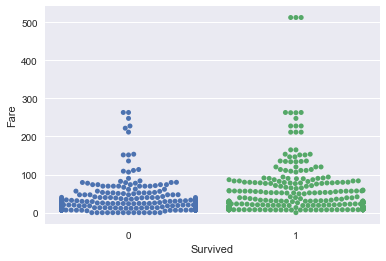

In [67]:
# A Categorical Scatterplot with Non-Overlapping Points
sns.swarmplot(x='Survived', y='Fare', data=train);

In [68]:
train.groupby('Survived').Fare.describe()

count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

*Fare is definitely correlated with survival aboard the Titanic.*

### 2.3) Age: Passenger's Age in Years - Survival Analysis

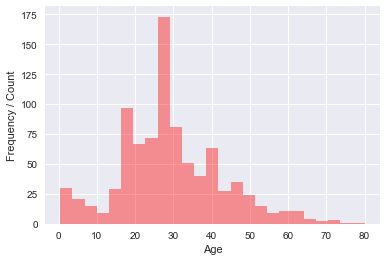

In [69]:
#For age affect on survival
sns.distplot(train.Age, kde=False, color='Red');
plt.ylabel('Frequency / Count');

*Most passengers travelling with the Titanic were within the age of 20 to 40 years.*

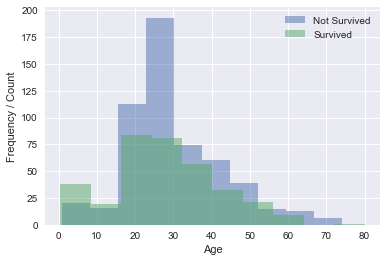

In [70]:
train.groupby(['Survived']).Age.hist(alpha=0.50);
plt.ylabel('Frequency / Count');
plt.xlabel('Age');
labels = ['Not Survived', 'Survived'];
plt.legend(labels);

A peak is seen in age range of 20-30 years

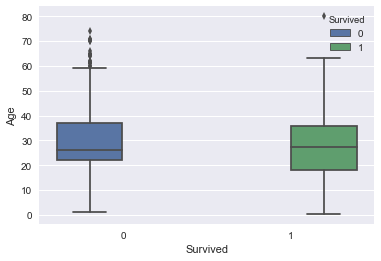

In [71]:
sns.boxplot(x='Survived', y='Age', hue='Survived', data=train);

* The round-number for following suggest possible data truncation:
    * "Not Survived": min (0 year) and max (60 years), and
    * "Survived": min (0 year) and max (63 years)

*The passengers who were young had a higher chance of surviving.*

Performing further analysis based upon passenger's age.

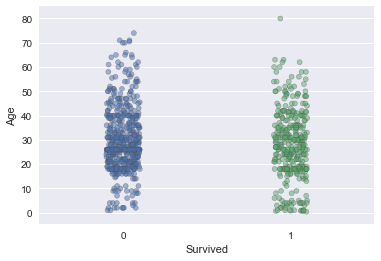

In [72]:
# A Categorical Scatterplot
sns.stripplot(x='Survived', y='Age', data=train, jitter=True, alpha=0.5, linewidth=0.5);

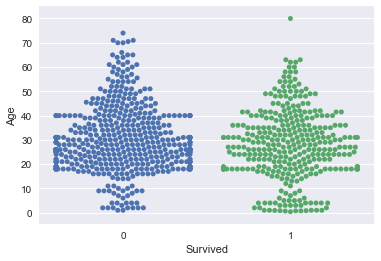

In [73]:
# A Categorical Scatterplot with Non-Overlapping Points
sns.swarmplot(x='Survived', y='Age', data=train);

In [74]:
train.groupby('Survived').Age.describe()

count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         549.0  29.804189  12.933801  1.00  22.0  26.0  37.0  74.0
1         342.0  28.098450  14.327279  0.42  18.0  27.5  36.0  80.0

*Age is somewhat correlated with survival aboard the Titanic.*

A scatter plot of 'Age' against 'Fare':

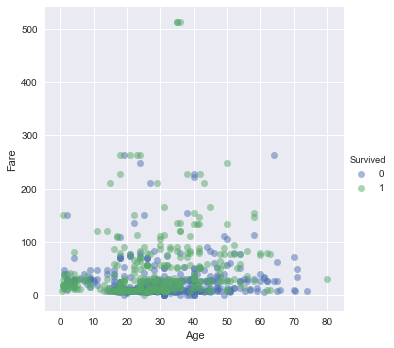

In [75]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train, fit_reg=False, scatter_kws={'alpha': 0.5});

*It can inferred that, those who survived either paid quite a bit or they were young.*

# **Supervised Machine Learning**

* Goal: Predictive Analytics
    * With the given set of predictive & target variables, train the model to predict target varibale in test dataset, hence **Supervised**

* The target variable is categorical, hence it is a **Classification**
    * Now, from the EDA it can be deduced that the variables have not assumed any functional form. So, initiate the training with **Non-Parametric Models**, such as **Decision Trees**. And later, other models can be tested.

In [76]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [77]:
# Creating new column Child with values 'NaN'
train['Child'] = float('NaN')
test['Child'] = float('NaN')

# Assigning 1 to passengers under 18, 0 to those 18 or older
train.loc[train.Age < 18, ['Child']] = 1
train.loc[train.Age >=18, ['Child']] = 0
test.loc[test.Age < 18, ['Child']] = 1
test.loc[test.Age >=18, ['Child']] = 0

In [78]:
# Converting the male and female groups to integer form
train.loc[train.Sex == 'male', ['Sex']] = 0
train.loc[train.Sex == 'female', ['Sex']] = 1

In [79]:
# Imputing the 2 missing "Embarked" variable to S (72% of passengers embarked from Southampton)
train['Embarked'] = train['Embarked'].fillna('S')

In [80]:
# Converting the "Embarked" classes to integer form
train.loc[train.Embarked == 'S', ['Embarked']] = 0
train.loc[train.Embarked == 'C', ['Embarked']] = 1
train.loc[train.Embarked == 'Q', ['Embarked']] = 2

In [81]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1      0   
2                             Heikkinen, Miss. Laina   1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1      0   
4                           Allen, Mr. William Henry   0  35.0      0      0   

             Ticket     Fare Cabin Embarked Salutation Group_Salutation  Child  
0         A/5 21171   7.2500   NaN        0         Mr               Mr    0.0  
1          PC 17599  71.2833   C85        1        Mrs              Mrs    0.0  
2  STON/O2. 3101282   7.9250   NaN        0       Miss             Miss    0.0  
3            113803  53.1000  C123        0        Mrs              Mrs    0.0  
4            373450   8.0500   NaN        0         Mr               Mr    0.0

## 1) Creating Decision Tree

Creating following numpy arrays to build a decision tree:
* target: one-dimensional numpy array containing "Survival"
* features: multidimensional numpy array containing "Pclass", "Sex", "Age", "Embarked", "Fare"

Assumption: larger families need more time to get together on a sinking ship, and hence have lower probability of surviving.

In [82]:
# Creating "family_size" - a newly defined feature:
train["family_size"] = train["SibSp"] + train["Parch"] + 1
test['family_size'] = test['SibSp'] + test['Parch'] + 1

In [83]:
# Creating the target and features numpy arrays:
target = train['Survived'].values
features = train[['Pclass', 'Sex', 'Age', 'Embarked', 'Fare', 'family_size']].values

In [84]:
# Fitting decision tree: survival_tree
model_max_depth = 10
model_min_samples_split = 5
survival_tree = DecisionTreeClassifier(max_depth=model_max_depth, 
                                            min_samples_split=model_min_samples_split, random_state = 1)
survival_tree = survival_tree.fit(features, target)

In [85]:
# Looking at the importance of the included features
survival_tree.feature_importances_

array([ 0.10244576,  0.40903943,  0.12998215,  0.00967636,  0.23359763,
        0.11525868])

"Sex" variable plays the most important role in determining whether or not a passenger survived.

In [86]:
# Calculating the mean accuracy of the tree
survival_tree.score(features, target)

0.90347923681257014

#### Predicting the target variable "Survival" in the "test" dataset
* In EDA, test data has one missing value in "Fare" variable in row 153. Imputing it with the median value.

In [87]:
# Imputing the missing value with the median
test.loc[152, 'Fare'] = test.Fare.median()

In [88]:
# Converting the male and female groups to integer form
test.loc[test.Sex == 'male', ['Sex']] = 0
test.loc[test.Sex == 'female', ['Sex']] = 1

In [89]:
# Converting the "Embarked" classes to integer form
test.loc[test.Embarked == 'S', ['Embarked']] = 0
test.loc[test.Embarked == 'C', ['Embarked']] = 1
test.loc[test.Embarked == 'Q', ['Embarked']] = 2

In [90]:
# Extracting the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[['Pclass', 'Sex', 'Age', 'Embarked', 'Fare', 'family_size']].values

In [91]:
# Making prediction using the test set
decision_tree_prediction = survival_tree.predict(test_features)

In [92]:
PassengerId = np.array(test["PassengerId"]).astype(int)
decision_tree_solution = pd.DataFrame(decision_tree_prediction, PassengerId, columns = ["Survived"])

In [93]:
decision_tree_solution.shape

(418, 1)

In [94]:
decision_tree_solution.to_csv("decision_tree_solution.csv", index_label = ["PassengerId"])

Submission on Kaggle: **76.55%** accuracy.

## 2) Creating Random Forests

In [95]:
features_forest = train[['Pclass', 'Sex', 'Age', 'Embarked', 'Fare', 'family_size']].values

In [96]:
forest = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 100, random_state = 1)
model_forest = forest.fit(features_forest, target)

In [97]:
# Looking at the importance of the included features
model_forest.feature_importances_

array([ 0.10057203,  0.31310208,  0.22396854,  0.03225506,  0.24471923,
        0.08538306])

"Sex" variable plays the most important role in determining whether or not a passenger survived.

In [98]:
model_forest.score(features_forest, target)

0.9427609427609428

In [99]:
test_features = test[['Pclass', 'Sex', 'Age', 'Embarked', 'Fare', 'family_size']].values
pred_forest = model_forest.predict(test_features)

In [100]:
PassengerId = np.array(test["PassengerId"]).astype(int)
forest_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])

In [101]:
forest_solution.shape

(418, 1)

In [102]:
forest_solution.to_csv("forest_solution.csv", index_label = ["PassengerId"])

Submission on Kaggle: **77.51%** accuracy.

## 3) Creating Logistic Regression

In [103]:
# Seperating the feature columns from the target column
X_train = train.drop(['PassengerId','Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 
            'Salutation', 'Group_Salutation', 'Child'], axis = 1)

In [104]:
y_train = train['Survived']

In [105]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
X_test = test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 
            'Salutation', 'Group_Salutation', 'Child'], axis = 1)

In [107]:
log_prediction = logmodel.predict(X_test)

Submission on Kaggle: **77.03%** accuracy.

In [108]:
# Comparision
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Decision Tree: 0.772186 (0.011116)
Random Forest: 0.800213 (0.016251)
Logistic Regression: 0.802479 (0.025878)
